# `AllLife Credit Card Customer Segmentation`


## `Domain:`
Banking

## `Description:`
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## `Attributes Information:`
<table style="margin-left: 0">
<tbody>
<tr>
<td></td>
<td style="text-align:left;"><strong>Name</strong></td>
<td><strong>Data Type</strong></td>
<td style="text-align:left;"><strong>Description</strong></td>
</tr>
<tr style="border-top: 1px solid gray">
<td>1.</td>
<td style="font-weight: bold;text-align:left;">Sl_No</td>
<td><span>categorical</span></td>
<td style="text-align:left;">Record identifier</td>
</tr>
<tr style="border-top: 1px solid gray">
<td>2.</td>
<td style=" font-weight: bold;text-align:left;">Customer Key</td>
<td><span>categorical</span></td>
<td style="text-align:left;">Identifier for the customer</td>
</tr>
<tr style="border-top: 1px solid gray">
<td>3.</td>
<td style=" font-weight: bold;text-align:left;">Avg_Credit_Limit</td>
<td><span>numerical</span></td>
<td style="text-align:left;">Average credit limit across all the credit cards</td>
</tr>   
<tr style="border-top: 1px solid gray">
<td>4.</td>
<td style=" font-weight: bold;text-align:left;">Total_Credit_Cards</td>
<td><span>numerical</span></td>
<td style="text-align:left;">Total number of credit cards</td>
</tr>     
<tr style="border-top: 1px solid gray">
<td>5.</td>
<td style=" font-weight: bold;text-align:left;">Total_visits_bank</td>
<td><span>numerical</span></td>
<td style="text-align:left;">Total number of bank visits</td>
</tr>
<tr style="border-top: 1px solid gray">
<td>6.</td>
<td style=" font-weight: bold;text-align:left;">Total_visits_online</td>
<td><span>numerical</span></td>
<td style="text-align:left;">Total number of online visits</td>
</tr>
<tr style="border-top: 1px solid gray">
<td>7.</td>
<td style=" font-weight: bold;text-align:left;">Total_calls_made</td>
<td><span>numerical</span></td>
<td style="text-align:left;">Total number of calls made by the customer</td>
</tr>    
</tbody>
</table>

## `Objective:`
Is to identify different segments in the existing customers based on their spending patterns as well as past interaction with the bank.

## `Steps and tasks`

<ol>
    <li><a href = #lib_import_section>Libraries & Dataset Import</a></li>
    <li><a href = #eda_section>EDA</a></li>
    <ol>
        <li><a href = "#eda_uni_section">Univariate Analysis</a></li>
        <li><a href = "#eda_bi_section">Bivariate Analysis</a></li>
        <li><a href = "#getting_data_ready">Getting data ready</a></li>
    </ol>
    <li><a href = #kmeans_clustering>K-means clustering (centroid based)</a></li>
    <ol>
        <li><a href = "#kmeans_sel_K_section">Selecting K</a></li>
        <li><a href = "#kmeans_model_section">Building the model and analyzing results</a></li>
        <li><a href = "#kmeans_summary_section">Summary</a></li>
    </ol>
    <li><a href = #hierarchical_clustering>Hierarchical clustering (connectivity based)</a></li>
    <ol>
        <li><a href = "#hierarchical_linkage_section">Selecting best linkage method</a></li>
        <li><a href = "#hierarchical_building_section">Building the model and analyzing results</a></li>
        <li><a href = "#hierarchical_summary_section">Summary</a></li>
    </ol>
    <li><a href = #pca_clustering>PCA vs Clustering</a></li>
    <ol>
        <li><a href = "#pca_exec_section">Execute PCA and Clustering</a></li>
        <li><a href = "#pca_analysis_section">Correlation between principal components and features</a></li>
        <li><a href = "#pcal_building_section">Building the model and analyzing results</a></li>
        <li><a href = "#pca_summary_section">Summary</a></li>
    </ol>    
    <li><a href = #avg_silh_scores>Average silhouette score (K-Means / Hierarchical)</a></li>
    <li><a href = #compare_clustering>Compare K-means / Hierarchical clusters</a></li>
    <li><a href = #conclusions_section>Conclusions</a></li>
</ol>

## <a id = "lib_import_section"></a>1. Libraries & Dataset Import

In [1]:
# Basic imports
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display

In [2]:
df = pd.read_excel('Credit Card Customer Data.xlsx')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
df.shape

(660, 7)

## <a id = "eda_section"></a> 2. EDA

### <a id = "eda_uni_section"></a> Univariate Analysis

First of all let's have a look at ids.

In [4]:
df[['Sl_No', 'Customer Key']].nunique()

Sl_No           660
Customer Key    655
dtype: int64

**Insights:**

- This is interesting, **Customer Key** column has duplicate customer ids? Why could that be, let's display those rows.

In [5]:
dup_customer_df = df.groupby('Customer Key').count().reset_index()
dup_customers = dup_customer_df[dup_customer_df['Total_calls_made'] > 1]['Customer Key'].values
df[df['Customer Key'].isin(dup_customers)].sort_values(by='Customer Key')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


**Insights:**

- As we can see the records with the same **Customer Key** are absolutely different from one another. Hence the conclusion is that they are actually different customers and there was some kind of mistake entering customer ids. Or **Customer Key** is an indication of belonging to some sort of group (but just 5 groups of 2 customers). Either way this is not useful for our further analysis.
- Also **Sl_No** is just an identifier and not important for our further analysis and should be dropped.

Let's clean it up rightaway.

In [6]:
cdf = df.copy()
cdf.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)
cdf.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [7]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [8]:
cdf.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

**Insights:**

- There are 660 customers in the dataset.
- There are no NULL values.
- All data types are numerical: int64.

In [9]:
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


**Insights:**

- Average **credit limit** is about **34,574**, **50%** of the customers have limit lower than **18,000**, so we have strongly skewd data.
- All other attributes have close **mean** & **medium**.
- **50%** of people have more than **5** cards, but maximum of **10** cards. Each customer has at leas one card.
- **Total_visits_bank**, **Total_visits_online** and **Total_calls_made** variables basically represent a way people communicate with the bank. We can see that **on average** any of the methods is not used a lot and amounts to **2-3 times**.

In [10]:
cdf.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**Insights:**

- **Avg_Credit_Limit** variable is quite diverse **110** unique values out of **660** total.
- The rest of the variables don't have a lot of unique values.

In [11]:
duplicate_count = cdf.duplicated(keep='first').sum()
print('Total duplicates: ', duplicate_count)

Total duplicates:  11


**Insights:**

- There are **11 duplicates** or customers that look alike.

### Define Utility Functions

In [12]:
def plot_counts_percentages(data, col, vr=0):
    total_clients = data.shape[0]
    chart = sns.countplot(data[col], order = data[col].value_counts().index, palette='muted');
    chart.set(title=col.title(), xlabel='', ylabel='Count')
    chart.set_xticklabels(chart.get_xticklabels(),  rotation=vr)
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}'.format((height/total_clients)*100), ha='center')

def display_num_stat_graph(data, col, hist_color='seagreen', hist_mean='tomato', hist_median='steelblue', box_color='steelblue'):
    f = plt.figure(figsize=(15,5))
    gs = f.add_gridspec(1, 2)

    with sns.axes_style("whitegrid"):
        ax = f.add_subplot(gs[0, 0])
        sns.distplot(data[col], color=hist_color, kde=True, rug=True)
        ax.axvline(data[col].mean(), color = hist_mean, label='Mean')
        ax.axvline(data[col].median(), color = hist_median, label='Median')
        ax.legend()

    with sns.axes_style("darkgrid"):
        ax = f.add_subplot(gs[0, 1])
        sns.boxplot(x=data[col], notch = True, whis = 1.5, color=box_color)
    
    f.tight_layout()
    plt.show()
    
def printc(text, color):
    colors = {
        'black':'\033[30m',
        'red':'\033[31m',
        'green':'\033[32m',
        'orange':'\033[33m',
        'blue':'\033[34m',
        'purple':'\033[35m',
        'cyan':'\033[36m',
        'lightgrey':'\033[37m',
        'darkgrey':'\033[90m',
        'lightred':'\033[91m',
        'lightgreen':'\033[92m',
        'yellow':'\033[93m',
        'lightblue':'\033[94m',
        'pink':'\033[95m',
        'lightcyan':'\033[96m'
    }
    style = {
        'reset':'\033[0m',
        'bold':'\033[01m'
    }
    
    print(colors[color], text, style['reset'])
        

def display_num_skew_outliers(data, col):
    # Computing IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    LowerWhisker = Q1 - 1.5 * IQR
    MinValue = data[col].min()
    UpperWhisker = Q3 + 1.5 * IQR
    MaxValue = data[col].max()
    
    # Update whiskers
    LowerWhisker = max(MinValue, LowerWhisker)
    UpperWhisker = min(MaxValue, UpperWhisker)
    
    # Outliers
    LowerOutliers = data[data[col] < LowerWhisker][col]   
    LowerOutliersCount = LowerOutliers.count()
    UpperOutliers = data[data[col] > UpperWhisker][col]
    UpperOutliersCount = UpperOutliers.count()

    print('>', col.title())
    printc('Mean         : {}'.format(data[col].mean()), 'red') 
    printc('Median       : {}'.format(data[col].median()), 'blue') 
    print('Skew          :', data[col].skew())
    print('Lower whisker :', LowerWhisker)
    print('Upper whisker :', UpperWhisker)

    print('Outliers above upper whisker: ', UpperOutliersCount, '({:.1f}%)'.format( (UpperOutliersCount/data.shape[0])*100) )
    if(UpperOutliersCount > 0):
        print('  > (closest 15):', ', '.join(map(str, UpperOutliers.head(15))))
    
    print('Outliers under lower whisker: ', LowerOutliersCount, '({:.1f}%)'.format( (LowerOutliersCount/data.shape[0])*100) )
    if(LowerOutliersCount > 0):
        print('  > (closest 15):', ', '.join(map(str, LowerOutliers.head(15))))

Let's see the distribution for the variables with low number of unique values, namely **Total_Credit_Cards**, **Total_visits_bank**, **Total_visits_online** and **Total_calls_made**

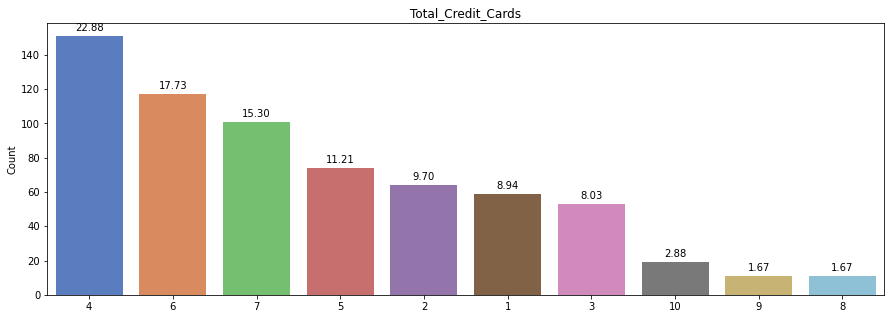

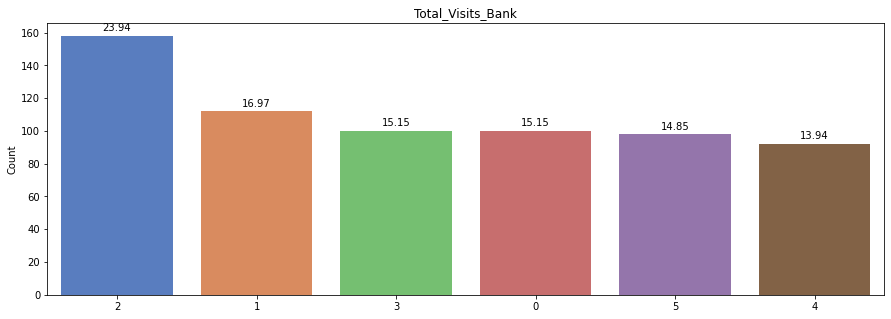

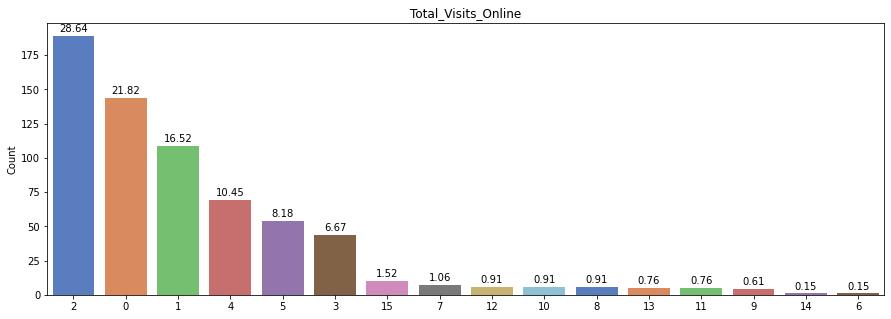

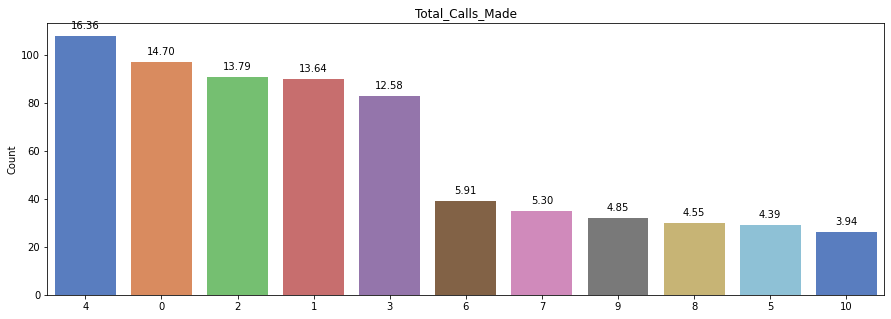

In [13]:
for col in ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']:
    plt.figure(figsize=(15,5))
    plot_counts_percentages(cdf, col)
    plt.show()

**Insights:**

- Definetly some visual groups are forming here.
- From **Total_Credit_Cards** we see that **27%** have **1-3**, **67%** have **4-7** and **6%** have **8-10** cards.
- Roughly **2-3** groups for **Total_visits_bank**. **24%** of customers visited bank **2** times. All other groups (0, 1, 3, 4, 5 visits) about the same and amount to **13-17%** each.
- Pretty easy to notice **3** groups for **Total_visits_online**. Most of the **online visits** (92%) fall into the range from **0 to 5** times. Interestingly, **29%** corresponds to **2** visits, this mimics **visits in person**.
- Same for **Total_calls_made**, **3** distinct groups. Most of the **calls** (71%) fall into the range from **0 to 4** times.  All other groups (6, 7, 8, 9, 10 calls) roughly the same and amount to **4-6%** each.
- One overall conclusion that we can make is that **regardless of the way** to contact the bank, majority of the clients would do it **0-5** times at most.

Let's check for outliers/skewness

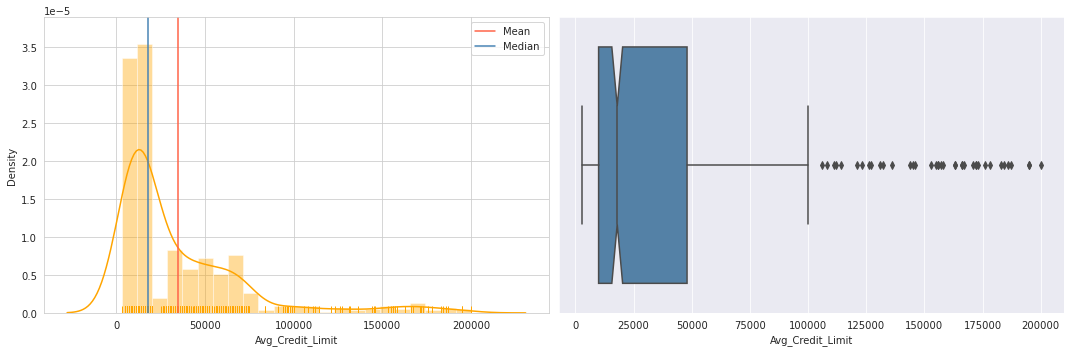

> Avg_Credit_Limit
 Mean         : 34574.242424242424 
 Median       : 18000.0 
Skew          : 2.202395623436587
Lower whisker : 3000
Upper whisker : 105000.0
Outliers above upper whisker:  39 (5.9%)
  > (closest 15): 157000, 163000, 131000, 136000, 121000, 158000, 108000, 166000, 176000, 166000, 178000, 156000, 146000, 155000, 200000
Outliers under lower whisker:  0 (0.0%)


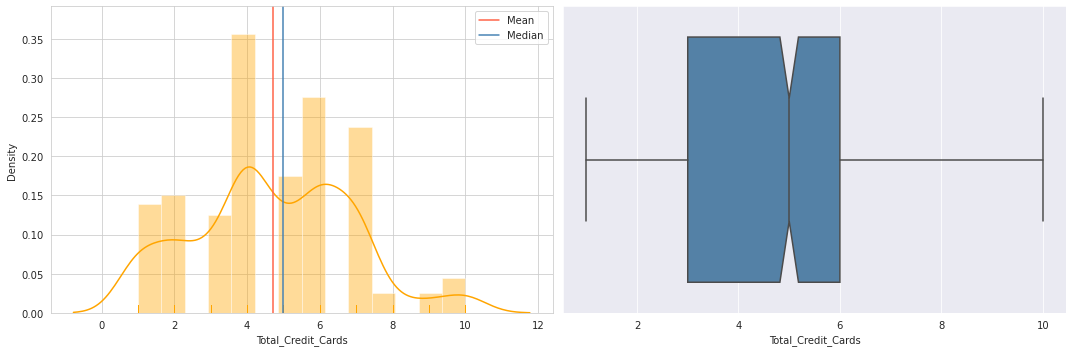

> Total_Credit_Cards
 Mean         : 4.706060606060606 
 Median       : 5.0 
Skew          : 0.14487899029570606
Lower whisker : 1
Upper whisker : 10
Outliers above upper whisker:  0 (0.0%)
Outliers under lower whisker:  0 (0.0%)


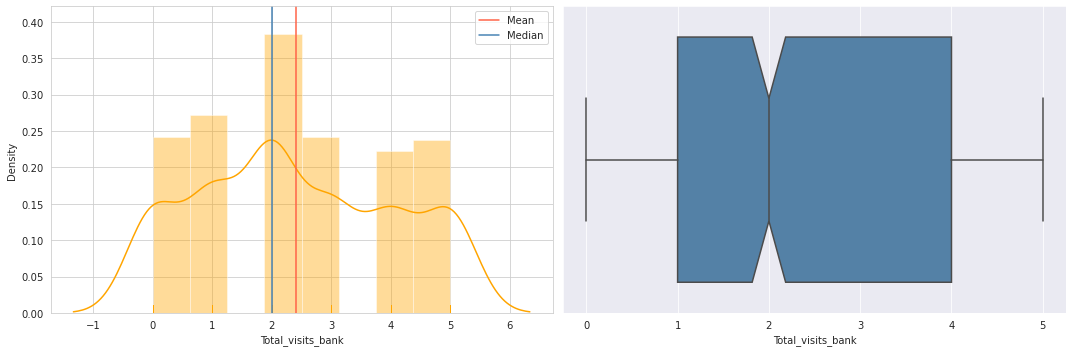

> Total_Visits_Bank
 Mean         : 2.403030303030303 
 Median       : 2.0 
Skew          : 0.14189601482438785
Lower whisker : 0
Upper whisker : 5
Outliers above upper whisker:  0 (0.0%)
Outliers under lower whisker:  0 (0.0%)


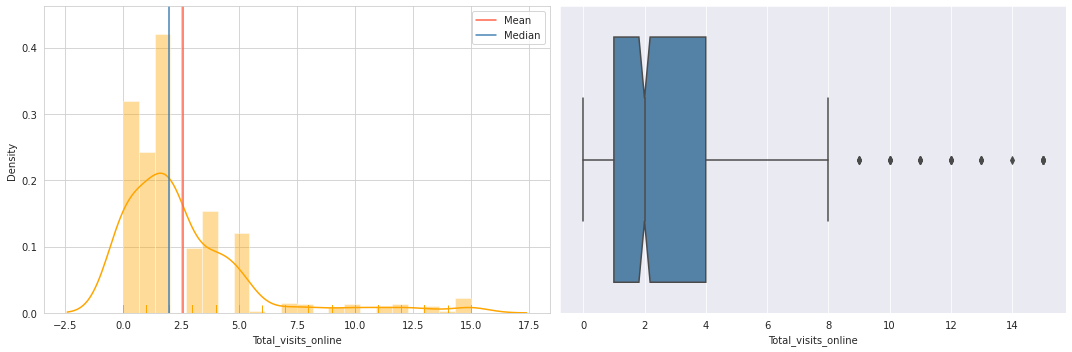

> Total_Visits_Online
 Mean         : 2.606060606060606 
 Median       : 2.0 
Skew          : 2.2256067138726565
Lower whisker : 0
Upper whisker : 8.5
Outliers above upper whisker:  37 (5.6%)
  > (closest 15): 10, 12, 11, 14, 11, 10, 11, 13, 13, 13, 15, 12, 15, 11, 10
Outliers under lower whisker:  0 (0.0%)


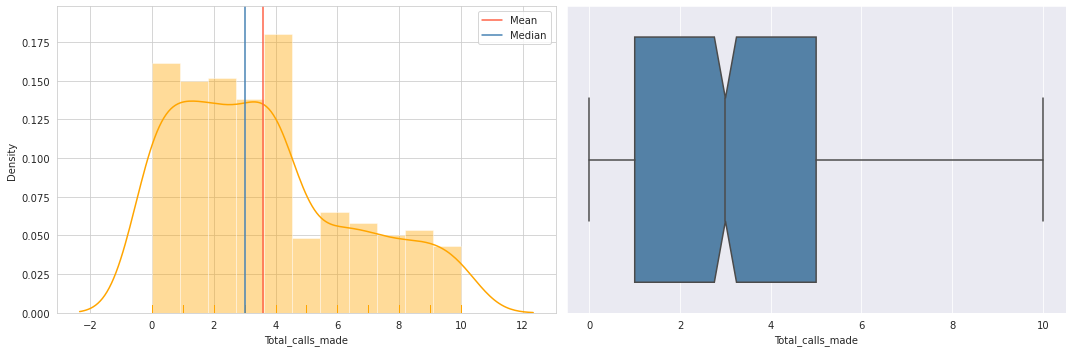

> Total_Calls_Made
 Mean         : 3.5833333333333335 
 Median       : 3.0 
Skew          : 0.6589053024181467
Lower whisker : 0
Upper whisker : 10
Outliers above upper whisker:  0 (0.0%)
Outliers under lower whisker:  0 (0.0%)


In [14]:
for col in ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']:
    display_num_stat_graph(cdf, col, hist_color='orange')
    display_num_skew_outliers(cdf, col)

**Insights:**

- Looking at **Avg_Credit_Limit** we can see that there are many customers that are statistically outliers (6%), data positively skewed indicating customers with bigger credit limits than average.
- **Total_Visits_Online** variable has the same problem with outliers - 5.6% and considerable positive skew.
- To sum this up we will need to **treat these outliers** as we know that **Euclidean distance** is very sensitive to them.

### <a id = "eda_bi_section"></a> Bivariate Analysis

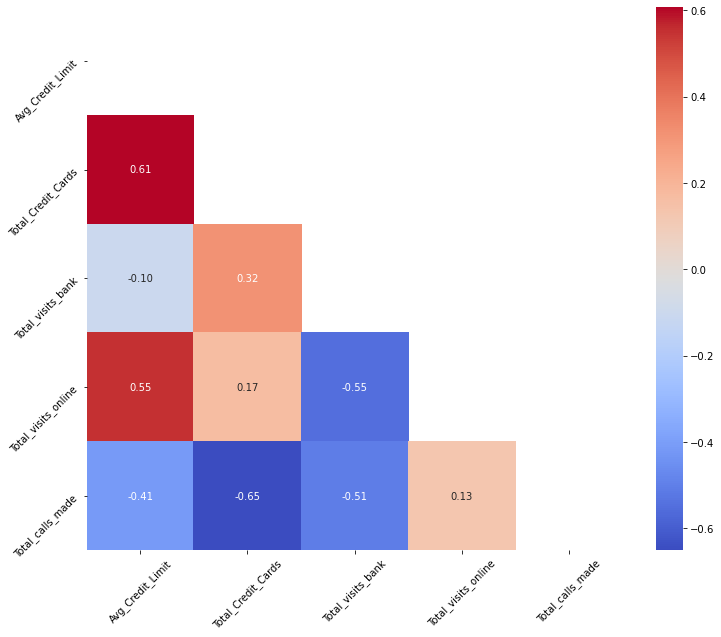

In [15]:
plt.figure(figsize=(12, 10))
mask = np.zeros_like(cdf.corr())
mask[np.triu_indices_from(mask)] = True
heatmap= sns.heatmap(cdf.corr(), annot = True, cmap='coolwarm', fmt='0.2f', cbar = True, mask=mask)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontweight='light')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, fontweight='light')
plt.show()

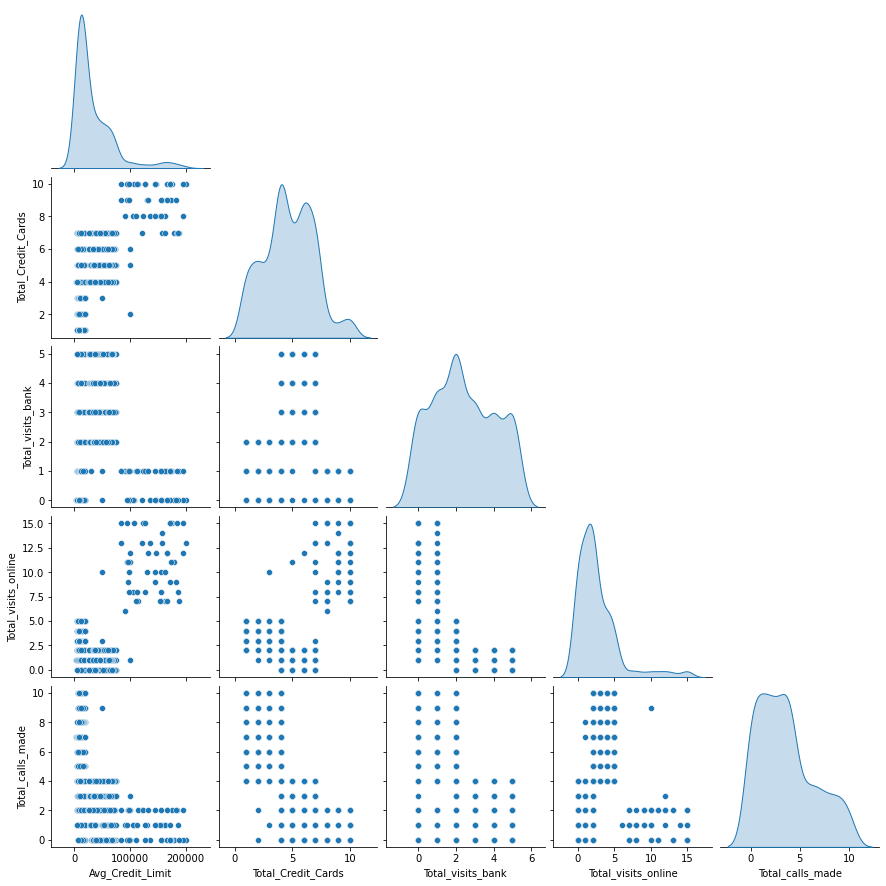

In [16]:
sns.pairplot(cdf, corner=True, diag_kind = 'kde')
plt.show()

**Insights:**

- Not surprizingly we can see some positive correlation between **Avg_Credit_Limit** and **Total_Credit_Cards**.
- Also interesting to see some negative correlation between **Total_Credit_Cards** and **Total_calls_made**, perhaps people with more cards prefer alternative ways working with the bank as for example going online.
- From **KDE plots** we can see possibly **3** clusters for **Avg_Credit_Limit**, **4** distinct clusters for **Total_Credit_Cards**, up to **6** posible clusters for **Total_visits_bank**, at least **2**, posibly **4** clusters for **Total_visits_online** and **2-4** for **Total_calls_made**.
- Also we can definetly see some clear splits in the data beween the pairs: **Total_visits_online**/**Avg_Credit_Limit**,  **Total_visits_online**/**Total_Credit_Cards**, **Total_calls_made**/**Total_visits_online**.

Let's see the data from **# of cards** perspective

In [17]:
cdf.groupby(['Total_Credit_Cards']).median()

,Avg_Credit_Limit,Total_visits_bank,Total_visits_online,Total_calls_made
Total_Credit_Cards,,,,
1,11000.0,1.0,4.0,7.0
2,11500.0,1.0,4.0,6.5
3,13000.0,1.0,4.0,6.0
4,17000.0,3.0,2.0,3.0
5,33000.0,3.0,1.0,2.0
6,26000.0,3.0,1.0,2.0
7,38000.0,3.0,1.0,2.0
8,145000.0,1.0,8.0,1.0
9,156000.0,1.0,11.0,2.0


**Insights:**

- Once again we see the correlation between **Total_Credit_Cards** and **Avg_Credit_Limit**.
- Also we can see some definite groups, our **potential clusters**. **Total_visits_bank** is higher for the group of customers who has 4-7 cards or 1700-38000 credit limit. **Total_visits_online** is very low for people who has 4-7 cards and relative credit limit, and the highest for people with 8-10 cards. **Total_calls_made** is the highest for people with a few cards.

Another way to look at it is by using **crosstab**:

In [18]:
pd.crosstab(cdf['Total_Credit_Cards'], cdf['Total_calls_made'])

Total_calls_made,0,1,2,3,4,5,6,7,8,9,10
Total_Credit_Cards,,,,,,,,,,,
1,0,0,0,0,6,8,7,12,7,10,9
2,1,0,1,0,12,7,11,8,12,6,6
3,0,1,0,0,7,8,13,6,4,9,5
4,23,22,21,19,23,6,8,9,7,7,6
5,13,14,15,14,18,0,0,0,0,0,0
6,27,22,20,30,18,0,0,0,0,0,0
7,20,18,19,20,24,0,0,0,0,0,0
8,4,5,2,0,0,0,0,0,0,0,0
9,3,2,6,0,0,0,0,0,0,0,0


In [19]:
pd.crosstab(cdf['Total_Credit_Cards'], cdf['Total_visits_online'])

Total_visits_online,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Total_Credit_Cards,,,,,,,,,,,,,,,,
1,0,0,18,9,17,15,0,0,0,0,0,0,0,0,0,0
2,0,1,14,15,18,16,0,0,0,0,0,0,0,0,0,0
3,0,2,12,8,14,16,0,0,0,0,1,0,0,0,0,0
4,44,25,44,11,20,7,0,0,0,0,0,0,0,0,0,0
5,22,23,28,0,0,0,0,0,0,0,0,1,0,0,0,0
6,35,38,43,0,0,0,0,0,0,0,0,0,1,0,0,0
7,43,20,30,1,0,0,0,1,1,0,1,1,0,2,0,1
8,0,0,0,0,0,0,1,4,2,1,0,0,0,1,0,2
9,0,0,0,0,0,0,0,0,1,1,2,2,3,0,1,1


In [20]:
pd.crosstab(cdf['Total_Credit_Cards'], cdf['Total_visits_bank'])

Total_visits_bank,0,1,2,3,4,5
Total_Credit_Cards,,,,,,
1,21,21,17,0,0,0
2,25,19,20,0,0,0
3,21,18,14,0,0,0
4,13,22,35,26,27,28
5,1,1,24,15,18,15
6,1,0,24,34,24,34
7,4,4,24,25,23,21
8,4,7,0,0,0,0
9,3,8,0,0,0,0


**Insights:**

- Basically we see the confirmation of our earlier findings about who, in what way and how often visit the bank, just with a little bit more deteail on counts.

# <a id = "getting_data_ready"></a>Getting data ready

First lets handle the outliers

In [21]:
no_outliers_df = cdf.copy()
no_outliers_df['Avg_Credit_Limit'] = np.log(no_outliers_df['Avg_Credit_Limit'])
no_outliers_df['Total_visits_online'] = np.log(1+no_outliers_df['Total_visits_online'])

Let's see the result

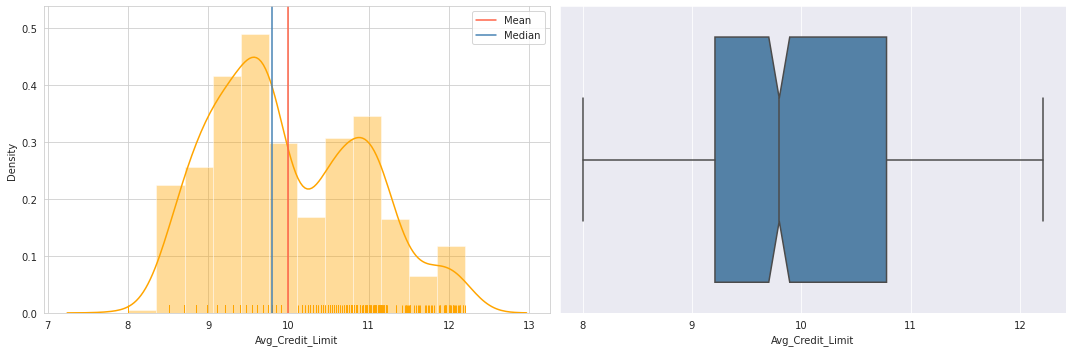

> Avg_Credit_Limit
 Mean         : 9.996115123882875 
 Median       : 9.798127036878302 
Skew          : 0.39375329930733727
Lower whisker : 8.006367567650246
Upper whisker : 12.206072645530174
Outliers above upper whisker:  0 (0.0%)
Outliers under lower whisker:  0 (0.0%)


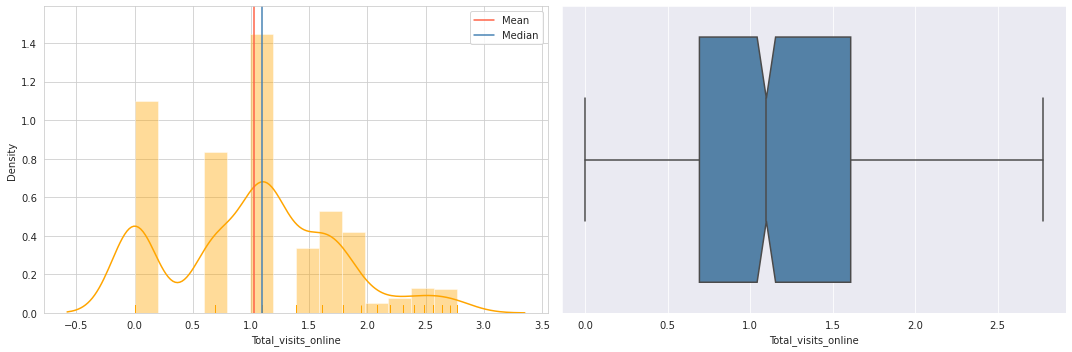

> Total_Visits_Online
 Mean         : 1.0253340277329264 
 Median       : 1.0986122886681098 
Skew          : 0.17088269077389912
Lower whisker : 0.0
Upper whisker : 2.772588722239781
Outliers above upper whisker:  0 (0.0%)
Outliers under lower whisker:  0 (0.0%)


In [22]:
for col in ['Avg_Credit_Limit', 'Total_visits_online']:
    display_num_stat_graph(no_outliers_df, col, hist_color='orange')
    display_num_skew_outliers(no_outliers_df, col)

**Insights:**

- We succesfully transformed the data so it does not have outliers and has less skewness.

Now we have to scale data before we can use it for clustering

In [23]:
from scipy.stats import zscore
scaled_df = no_outliers_df.apply(zscore)
scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-0.468807,-1.251537
1,0.885387,-0.787585,-1.473731,1.937062,1.891859
2,0.885387,1.058973,-0.860451,0.509415,0.145528
3,0.336281,0.135694,-0.860451,-0.468807,0.145528
4,1.630478,0.597334,-1.473731,2.172822,-0.203739


# <a id = "kmeans_clustering"></a>3. K-means clustering (centroid based)

### <a id = "kmeans_sel_K_section"></a>Selecting K

In [24]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

First let's find out the optimal number of groups/clusters

In [25]:
K_MIN = 1
K_MAX = 15
k_range = range(K_MIN, K_MAX)
mean_distortions=[]
mean_silhouette_scores=[]

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, n_init=15, random_state=33)
    
    prediction = kmeans_model.fit_predict(scaled_df)
    
    mean_distortions.append(sum(np.min(cdist(scaled_df, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])
    mean_silhouette_scores.append(silhouette_score(scaled_df, prediction, metric='euclidean') if k > 1 else np.NaN)

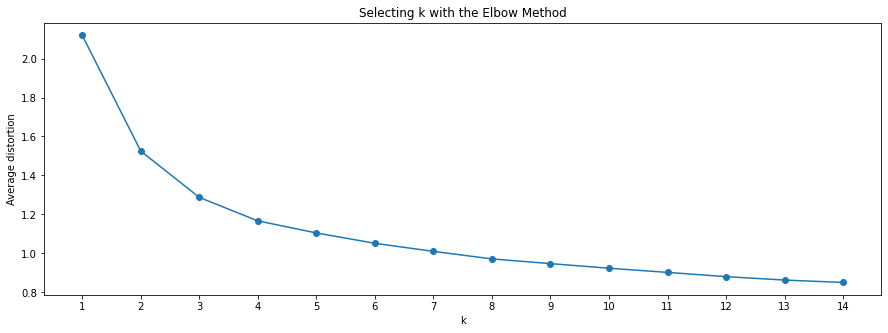

In [26]:
plt.figure(figsize=(15,5))
plt.plot(k_range, mean_distortions, marker = "o" )
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.xticks(range(K_MIN, K_MAX))
plt.show()

**Insights:**

- We can see the bend at **K = 3**, which supports our descoveries from **EDA** section.

Let's check **Silhouette Score** for different **K**. Silhouette score helps us with interpretation and validation of consistency within clusters of data. We will  go with average value for all samples.

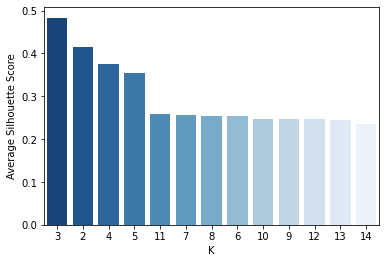

,K,Average Silhouette Score
2,3,0.483562
1,2,0.415301
3,4,0.376358
4,5,0.354222
10,11,0.258527
6,7,0.255563
7,8,0.254870
5,6,0.254428
9,10,0.247697
8,9,0.247631


In [27]:
sc_df = pd.DataFrame()
sc_df['K'] = k_range
sc_df['Average Silhouette Score'] = mean_silhouette_scores
sc_df.dropna(inplace=True)
sc_df.sort_values(by='Average Silhouette Score', ascending = False, inplace=True)

chart = sns.barplot(x='K', y='Average Silhouette Score', data=sc_df, order=sc_df['K'], palette='Blues_r')
plt.show()

sc_df

**Insights:**

- The **best** clustering results are for **K = 3**, following by K = 2 and 4.

### <a id = "kmeans_model_section"></a>Building the model and analyzing results

We will continue with **K=3**

In [28]:
kmeans_3_model = KMeans(n_clusters=3, n_init=15, random_state=33)
kmeans_3_labels = kmeans_3_model.fit_predict(scaled_df)

In [29]:
k3_labeled_df = cdf.copy()
k3_labeled_df['group'] = kmeans_3_labels
k3_labeled_df['group'] = k3_labeled_df['group'].astype('category')
k3_labeled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,100000,2,1,1,0,2
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,2
4,100000,6,0,12,3,0


Let's analyze our groups, and start with centroids:

In [30]:
centroids = kmeans_3_model.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(scaled_df))
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.945292,1.846476,-1.100953,1.976419,-0.854333
1,-0.730991,-1.054310,-0.898610,0.637381,1.143653
2,0.169956,0.372525,0.672750,-0.635958,-0.556643


Let's see this in an easier interpretable format:

In [31]:
k3_labeled_df.groupby('group').median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
group,,,,,
0,145000,9,1,11,1
1,12000,2,1,4,7
2,31000,6,3,1,2


In [32]:
k3_labeled_df['group'].value_counts()  

2    384
1    225
0     51
Name: group, dtype: int64

**Insights:**

- Interestingly the **3** groups that we can see are exactly those that we were able to detect in our <a href = #eda_bi_section>Bivariate Analysis</a> using groupby on **Total_Credit_Cards**. Hence the description of them stands the same.
- No surprisingly, **group 2** is the group of customers who has about **6** cards, this group also has the highest number of visits to the bank. **Group 1** corresponds to customers who does not have a lot of cards and prefer to contact bank by phone. **Group 0** is a group of people who has more than 8 cards and prefer to work with the bank online.

In [33]:
k3_labeled_scaled_df = scaled_df.copy()
k3_labeled_scaled_df['group'] = kmeans_3_labels
k3_labeled_scaled_df['group'] = k3_labeled_scaled_df['group'].astype('category')

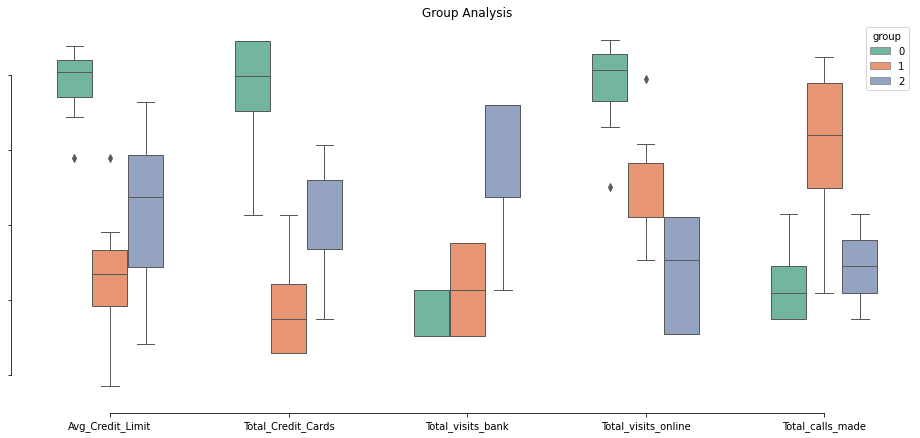

In [34]:
plt.figure(figsize=(16,7))
iris_long = pd.melt(k3_labeled_scaled_df, id_vars='group')
chart = sns.boxplot(x='variable', y='value', hue='group', data=iris_long, palette="Set2", width=0.6, linewidth=1, notch=False)
chart.set(title='Group Analysis', xlabel='', ylabel='')
chart.set(yticklabels=[])
sns.despine(offset=10, trim=True)
plt.grid(False)
plt.show()

Once again, we see our groups/clusters and their differences, this visual representation simply confirms what we already know. Let's conclude/summarize it for the last time here.

**Insights:**

* **Group 0** - clients have high number of credit cards and credit limits, they usually do not go to the bank's offices or call, and prefer to work with the bank online.
* **Group 1** - clients have small number of cards and low credit limits, they prefer to call the bank, and sometimes go online. They less likely to visit the bank in person.
* **Group 2** - clients have average number of credit cards and credit limits. They would rather go to the bank than call or use online services.

Finally let's see visit types vs groups in 3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

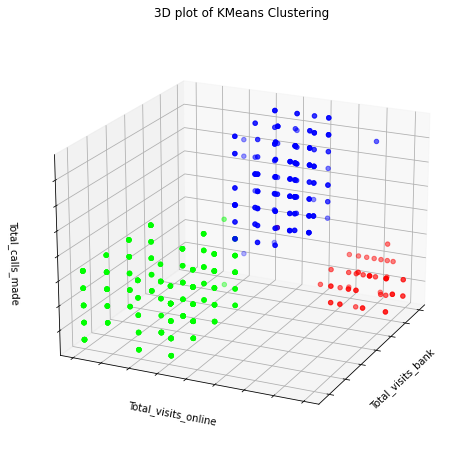

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=25)
k3_model=KMeans(3)
k3_model.fit(k3_labeled_scaled_df)
labels = k3_model.labels_
ax.scatter(
    k3_labeled_scaled_df['Total_visits_bank'],
    k3_labeled_scaled_df['Total_visits_online'],
    k3_labeled_scaled_df['Total_calls_made'],
    cmap='brg',
    c = labels.astype(np.float),
    edgecolor=None)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Total_visits_bank')
ax.set_ylabel('Total_visits_online')
ax.set_zlabel('Total_calls_made')
ax.set_title('3D plot of KMeans Clustering')

### <a id = "kmeans_summary_section"></a>Summary

We were able to find the best number of clusters using **Elbow Method** and **Average Silhouette Score**. Our model produced expected results which confirmed our findings in **EDA** section. Finally, we were able to clearly define and describe **3** distinct groups of customers.

Behind the scenes we also tried the next plausible option with **K=4** which showed a lot of overlap between 2 groups. This basically tell us that those are really 1 group and once again confirms our choice of **K=3**.

# <a id = "hierarchical_clustering"></a>4. Hierarchical clustering (connectivity based)

### <a id = "hierarchical_linkage_section"></a>Selecting best linkage method

We will start with finding the **best linkage method** for the **agglomerative hierarchical clustering**. **Cophenetic Correlation Coefficient** is a measure of the correlation between the distance of points in feature space and distance on the dendrogram. The closer it is to 1, the better is the clustering.

### Define Utility Functions

In [36]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

def calc_coph_corr_and_dendogramm(data, linkage_method, display_stat=False, display_den=False, display_n_clusters=3):
    linkage_matrix_Z = linkage(data, metric='euclidean', method=linkage_method)
    coph_corr, coph_dists = cophenet(linkage_matrix_Z , pdist(data))

    if(display_stat):
        print(f'Cophenetic Correlation - linkage {linkage_method}: {coph_corr:.4f}')
    
    if(display_den):
        plt.figure(figsize=(10, 5))
        plt.title(f'Dendogram - {linkage_method} linkage')
        plt.xlabel('')
        plt.ylabel('Distance')
        dendrogram(linkage_matrix_Z, truncate_mode='lastp', p=display_n_clusters)
        plt.show()
    
    return {'Z': linkage_matrix_Z, 'linkage':linkage_method, 'coph_corr': coph_corr}

Cophenetic Correlation - linkage single: 0.6184


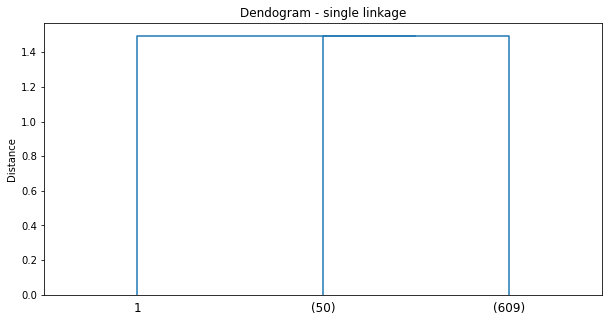

Cophenetic Correlation - linkage complete: 0.8102


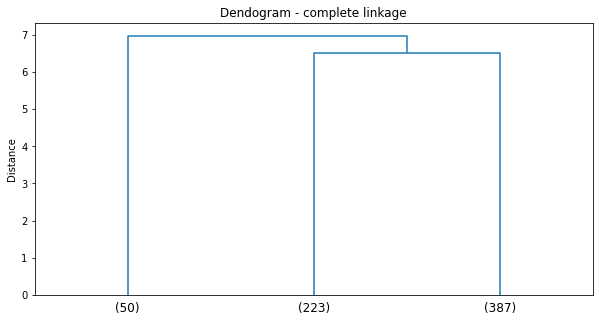

Cophenetic Correlation - linkage average: 0.8493


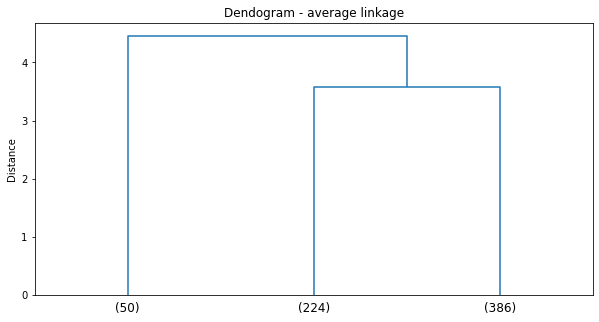

Cophenetic Correlation - linkage weighted: 0.8375


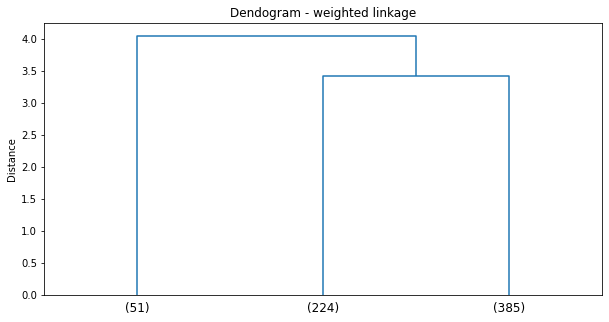

Cophenetic Correlation - linkage centroid: 0.8434


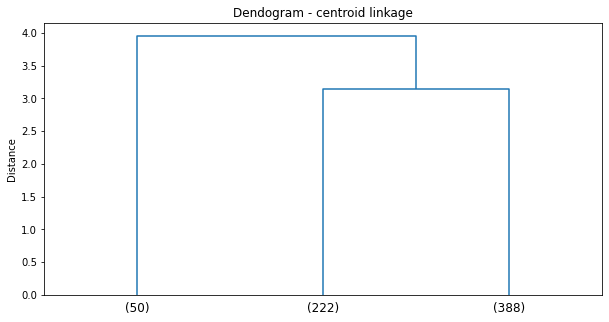

Cophenetic Correlation - linkage median: 0.8156


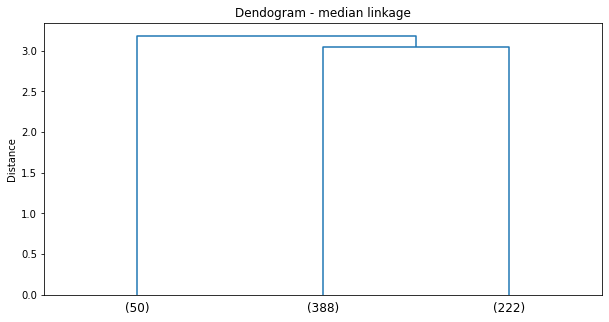

Cophenetic Correlation - linkage ward: 0.7647


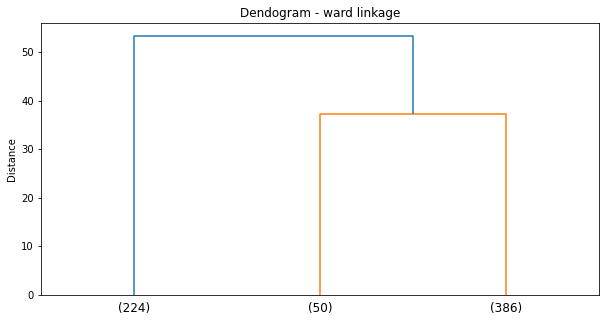

In [37]:
linkage_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
linkage_stats = []

for method in linkage_methods:
    result = calc_coph_corr_and_dendogramm(scaled_df, method, display_stat=True, display_den=True)
    linkage_stats.append(result)

**Insights:**
* As we found out it through our EDA and also KMeans clustering, we are looking for around **3** clusters, hence we are making this cut to see the distribution of data points.
* **Single** is probably the worst linkage method for our task, when we make our cut for 3 clusters, one of the clusters contains only 1 data point. All other methods deliver similar results from the number of datapoints in each cluster perspective.

In [38]:
linkages = []
coph_corrs = []
for stat_item in linkage_stats:
    linkages.append(stat_item['linkage'])
    coph_corrs.append(stat_item['coph_corr'])
    
coph_corr_linkage_df = pd.DataFrame(coph_corrs, columns = ['Cophenetic Correlation'], index = linkages).sort_values(by='Cophenetic Correlation', ascending=False).reset_index()
coph_corr_linkage_df.rename(columns = {'index': 'Linkage Method'}, inplace=True)    
display(coph_corr_linkage_df)

,Linkage Method,Cophenetic Correlation
0,average,0.849273
1,centroid,0.843392
2,weighted,0.837468
3,median,0.815555
4,complete,0.810166
5,ward,0.764678
6,single,0.618354


**Insights:**

- **Average** linkage method seems to give the best **Cophenetic Correlation** coefficient. With **centroid** and **weighted** linkages giving the 2nd and 3rd best results.

### <a id = "hierarchical_building_section"></a>Building the model and analyzing results

Let's build our model using **average** linkage and making out cut on **3** clusters.

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
agg_clustering_K3_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
agg_clustering_K3_labels = agg_clustering_K3_model.fit_predict(scaled_df)

In [41]:
agg_clustering_k3_labeled_df = cdf.copy()
agg_clustering_k3_labeled_df['group'] = agg_clustering_K3_labels
agg_clustering_k3_labeled_df['group'] = agg_clustering_k3_labeled_df['group'].astype('category')

Let's analyze our groups

In [42]:
agg_clustering_k3_labeled_df.groupby('group').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
group,,,,,
0,33803.108808,5.510363,3.484456,0.979275,1.992228
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12138.392857,2.419643,0.941964,3.558036,6.883929


In [43]:
agg_clustering_k3_labeled_df.groupby('group').median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
group,,,,,
0,31000,6,3,1,2
1,145500,9,1,11,1
2,11500,2,1,4,7


In [44]:
agg_clustering_k3_labeled_df['group'].value_counts()  

0    386
2    224
1     50
Name: group, dtype: int64

**Insights:**

- Although **mean** would give us our centroids, as we saw it previously, it is much easier to visually see the pattern (our groups) using **median** insted of **mean** aggregation.
- We can see the **3** groups that are exactly those that we were able to detect in our <a href = #eda_bi_section>Bivariate Analysis</a> using groupby on **Total_Credit_Cards**. Hence the description of them stands the same.
- No surprisingly, **Group 0** is the group of customers who has about **6** cards, this group also has the highest number of visits to the bank. **Group 2** corresponds to customers who does not have a lot of cards and prefer to contact bank by phone. **Group 1** is a group of people who have more than 8 cards and prefer to work with the bank online.

In [45]:
agg_clustering_k3_labeled_scaled_df = scaled_df.copy()
agg_clustering_k3_labeled_scaled_df['group'] = agg_clustering_K3_labels
agg_clustering_k3_labeled_scaled_df['group'] = agg_clustering_k3_labeled_scaled_df['group'].astype('category')

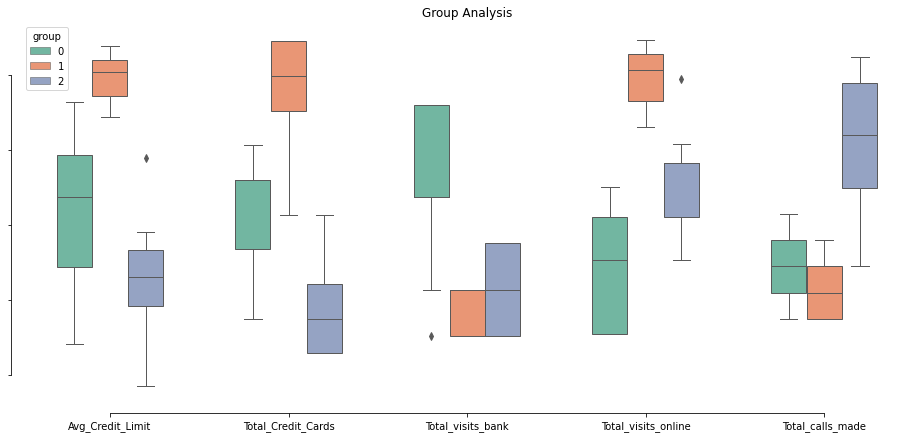

In [46]:
plt.figure(figsize=(16,7))
iris_long = pd.melt(agg_clustering_k3_labeled_scaled_df, id_vars='group')
chart = sns.boxplot(x='variable', y='value', hue='group', data=iris_long, palette="Set2", width=0.6, linewidth=1, notch=False)
chart.set(title='Group Analysis', xlabel='', ylabel='')
chart.set(yticklabels=[])
sns.despine(offset=10, trim=True)
plt.grid(False)
plt.show()

Once again, we see our groups/clusters and their differences, this visual representation simply confirms what we already know. Let's conclude/summarize it for the last time here.

**Insights:**

* **Group 0** - these are the clients who have average number of credit cards and credit limits. They would rather go to the bank in person than call or use online bank's services.
* **Group 1** - represents the clients who have high number of credit cards and credit limits. They usually do not go to the bank's offices or call, and prefer to work with the bank online.
* **Group 2** - clients who have small number of cards and low credit limits. They prefer to call the bank, and sometimes go online. They less likely to visit the bank in person.

And now let's see visit types vs cluster/labels in 3D

Text(0.5, 0.92, '3D plot of Agglomerative Clustering')

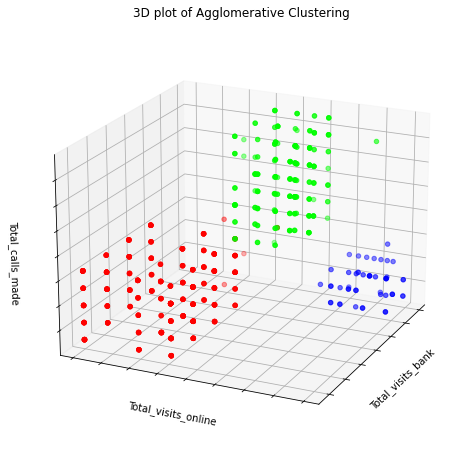

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=25)
k3_model=KMeans(3)
k3_model.fit(agg_clustering_k3_labeled_scaled_df)
labels = k3_model.labels_
ax.scatter(
    k3_labeled_scaled_df['Total_visits_bank'],
    k3_labeled_scaled_df['Total_visits_online'],
    k3_labeled_scaled_df['Total_calls_made'],
    cmap='brg',
    c = labels.astype(np.float),
    edgecolor=None)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Total_visits_bank')
ax.set_ylabel('Total_visits_online')
ax.set_zlabel('Total_calls_made')
ax.set_title('3D plot of Agglomerative Clustering')

### <a id = "hierarchical_summary_section"></a>Summary

We were able to find the best linkage method using **Dendograms** and **Cophenetic Correlation Coefficient**. Our model produced expected results which confirmed our findings in **EDA** section. Finally, we were able to clearly define and describe **3** distinct groups of customers.

# <a id = "pca_clustering"></a>5. PCA vs Clustering

As we know we have some correlation bewteen the variables. We can use **PCA** to eliminate that dependency, also along the way we can align the data along its natural axes which in turn may improve performance of the algoritms.

### <a id = "pca_exec_section"></a>Execute PCA and Clustering

First let's execute **PCA** for different number of principal components and run our clustering algorithms against it. We will need to collect and print some statistics to produce our eveluations.

In [48]:
from sklearn.decomposition import PCA

In [49]:
PC_MIN = 2
PC_MAX = 5
pc_range = range(PC_MIN, PC_MAX + 1)

K_MIN = 1
K_MAX = 14
k_range = range(K_MIN, K_MAX + 1)

stats_by_pc_dict = {}
mean_distortions=[]
mean_silhouette_scores=[]

for pc_count in pc_range:
    pca = PCA(pc_count)
    pca_reduced_aligned_set = pca.fit_transform(scaled_df)
    
    stats_by_pc_dict[pc_count] = {
        'kmeans_mean_distortions':[],
        'kmeans_mean_silhouette_scores': [],
        'agg_silhouette_scores': [],
        'pca_explained_variance_ratio':pca.explained_variance_ratio_}

    # Hierarchical
    agg_pca_K3_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
    agg_pca_K3_labels = agg_pca_K3_model.fit_predict(pca_reduced_aligned_set)
    stats_by_pc_dict[pc_count]['agg_silhouette_scores'].append(silhouette_score(pca_reduced_aligned_set, agg_pca_K3_labels, metric='euclidean') if k > 1 else np.NaN)
            
    for k in k_range:
        # K-Means
        pca_kmeans_model = KMeans(n_clusters=k, n_init=15, random_state=33)
        pca_kmeans_labels = pca_kmeans_model.fit_predict(pca_reduced_aligned_set)
        stats_by_pc_dict[pc_count]['kmeans_mean_distortions'].append(sum(np.min(cdist(pca_reduced_aligned_set, pca_kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])
        stats_by_pc_dict[pc_count]['kmeans_mean_silhouette_scores'].append(silhouette_score(pca_reduced_aligned_set, pca_kmeans_labels, metric='euclidean') if k > 1 else np.NaN)

Let's see how much of variation can principal components explain

In [50]:
def plot_var_explained_grid(data, pc_range, nrows, ncols):
    plt.figure(figsize=(17, 5))
    index = 1
    for pc_count in pc_range:
        with sns.axes_style("darkgrid"):
            cur_range = range(1, pc_count + 1)
            plt.subplot(nrows, ncols, index)
            plt.xticks(cur_range)
            plt.step(cur_range, np.cumsum(data[pc_count]['pca_explained_variance_ratio']), where='mid')
            plt.ylabel(f'Cum of variation explained') if (pc_range[0] == pc_count) else plt.ylabel('')
            plt.xlabel('')
            plt.title(f'PCA:{pc_count}')
        index += 1
    plt.show()

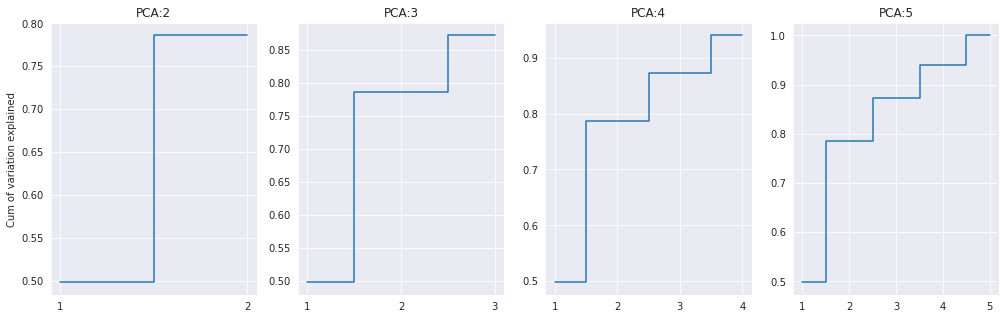

In [51]:
plot_var_explained_grid(stats_by_pc_dict, pc_range, 1, 4)

**Insights:**

- As we can see that **2 principal components** will expain about **78%** in original data variation. **3** - **87%** and so on. We should see what is the best from the clustering perspective.

Now let's display best **K** and **Average Silhouette Score** for **K-Means** clustering

In [52]:
kmeans_best_silh_sc_dict = {}
for pc_count in pc_range:
    sc_df = pd.DataFrame()
    sc_df['K'] = k_range
    sc_df['Average Silhouette Score'] = stats_by_pc_dict[pc_count]['kmeans_mean_silhouette_scores']
    sc_df.dropna(inplace=True)

    best_score = sc_df[sc_df['Average Silhouette Score']==sc_df['Average Silhouette Score'].max()]
    kmeans_best_silh_sc_dict[pc_count] = {
        'K': best_score['K'].values[0],
        'Average Silhouette Score': best_score['Average Silhouette Score'].values[0]
    }
kmeans_best_silh_sc_df = pd.DataFrame(kmeans_best_silh_sc_dict).T.reset_index()
kmeans_best_silh_sc_df.columns = ['PCA', 'K', 'Average Silhouette Score']
kmeans_best_silh_sc_df

,PCA,K,Average Silhouette Score
0,2,3.0,0.655868
1,3,3.0,0.575852
2,4,3.0,0.522893
3,5,3.0,0.483562


**Insights:**

- The best **Average Silhouette Score** is with **2 principal components** and equal to **0.655**.

Let's now see what is the case for **Hierarchical** clustering

In [53]:
agg_best_silh_sc_dict = {}
for pc_count in pc_range:
    sc_df = pd.DataFrame()
    sc_df['Average Silhouette Score'] = stats_by_pc_dict[pc_count]['agg_silhouette_scores']
    sc_df.dropna(inplace=True)
    
    agg_best_silh_sc_dict[pc_count] = {
        'Average Silhouette Score': sc_df['Average Silhouette Score'].values[0]
    }
aff_best_silh_sc_df = pd.DataFrame(agg_best_silh_sc_dict).T.reset_index()
aff_best_silh_sc_df.columns = ['PCA', 'Average Silhouette Score']
aff_best_silh_sc_df

,PCA,Average Silhouette Score
0,2,0.652715
1,3,0.573938
2,4,0.522765
3,5,0.483947


**Insights:**

- The best **Average Silhouette Score** is with **2 principal components** and equal to **0.652**.

### <a id = "pca_analysis_section"></a>Correlation between principal components and features

In [54]:
pca2 = PCA(n_components=2)
reduced_aligned_set = pca2.fit_transform(scaled_df)

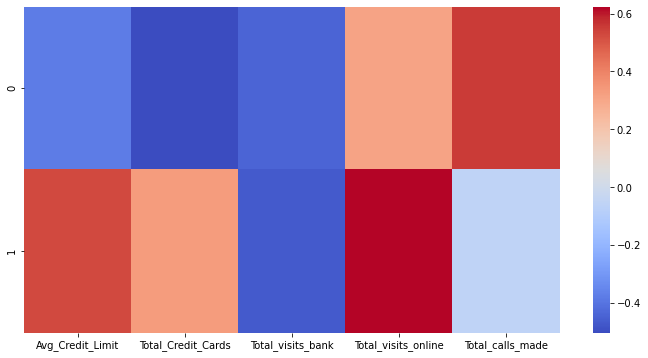

In [55]:
plt.figure(figsize=(12,6))
df_comp = pd.DataFrame(pca2.components_,columns=list(scaled_df))
sns.heatmap(df_comp, cmap='coolwarm')
plt.show()

**Insights:**

- This heatmap basically represents the correlation between the principal components and various features. In our case we can see some strong influence of certain features on our principal components. However it's hard to put a meaningful label on the componets.

### <a id = "pcal_building_section"></a>Building the model and analyzing results

Let's pick our best combination and build the model. This will be **K-Means** as it has the  **Silhouette Score** **0.655**.

In [56]:
kmeans_k3_pca2_model = KMeans(n_clusters=3, n_init=15, random_state=33)
kmeans_K3_pca2_labels = kmeans_k3_pca2_model.fit_predict(reduced_aligned_set)

In [57]:
kmeans_pca2_K3_model_labeled_df = cdf.copy()
kmeans_pca2_K3_model_labeled_df['group'] = kmeans_K3_pca2_labels
kmeans_pca2_K3_model_labeled_df['group'] = kmeans_pca2_K3_model_labeled_df['group'].astype('category')

Let's analyze our groups

In [58]:
kmeans_pca2_K3_model_labeled_df.groupby('group').median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
group,,,,,
0,12000,2,1,4,7
1,31000,6,3,1,2
2,145000,9,1,11,1


In [59]:
kmeans_pca2_K3_model_labeled_df['group'].value_counts()  

1    384
0    225
2     51
Name: group, dtype: int64

**Insights:**

- Once again we can see the **3** groups that are very similar to what we already saw (<a href = #kmeans_model_section>K-Means</a> and <a href = #hierarchical_building_section>Hierarchical</a>), no need to describe them again.

In [60]:
kmeans_pca2_K3_model_labeled_scaled_df = scaled_df.copy()
kmeans_pca2_K3_model_labeled_scaled_df['group'] = kmeans_K3_pca2_labels
kmeans_pca2_K3_model_labeled_scaled_df['group'] = kmeans_pca2_K3_model_labeled_scaled_df['group'].astype('category')

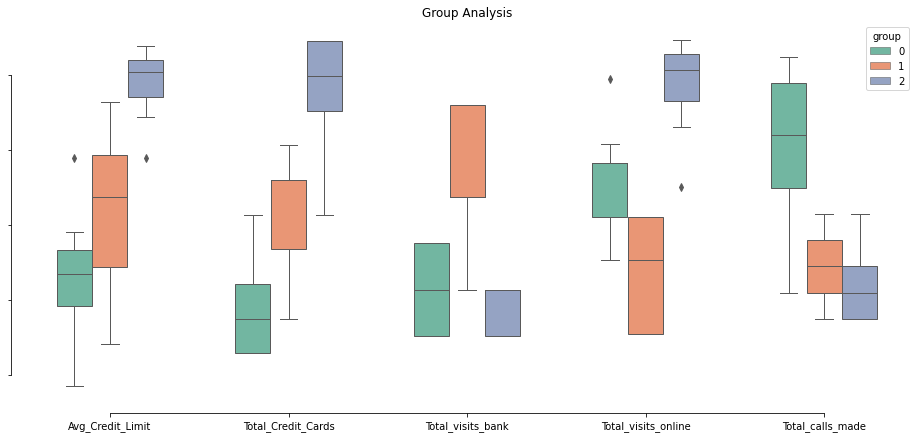

In [61]:
plt.figure(figsize=(16,7))
iris_long = pd.melt(kmeans_pca2_K3_model_labeled_scaled_df, id_vars='group')
chart = sns.boxplot(x='variable', y='value', hue='group', data=iris_long, palette="Set2", width=0.6, linewidth=1, notch=False)
chart.set(title='Group Analysis', xlabel='', ylabel='')
chart.set(yticklabels=[])
sns.despine(offset=10, trim=True)
plt.grid(False)
plt.show()

As before we see our groups/clusters and their differences, this visual representation simply confirms what we already know (<a href = #kmeans_model_section>K-Means</a> and <a href = #hierarchical_building_section>Hierarchical</a>).

Since we only use 2 principal components, it will be interesting to see the scatter plot.

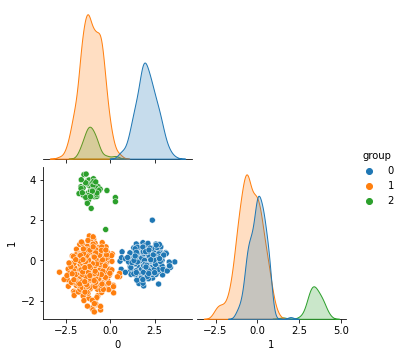

In [62]:
pca2_df = pd.DataFrame(reduced_aligned_set)
pca2_df['group'] = kmeans_K3_pca2_labels

sns.pairplot(pca2_df, corner=True, diag_kind = 'kde', hue='group', palette='tab10')
plt.show()

**Insights:**

- **3** distinct group in 2D!

### <a id = "pca_summary_section"></a>Summary

We used PCA to align data along its natural axes and remove the correlation between features. We used this new dataset for clustering and received results which turned out to be better than without PCA. The best clustering method was **K-Means** as it has the **Silhouette Score** **0.655**. And we did it on only **2** principal components.

# <a id = "avg_silh_scores"></a>5. Average silhouette score (K-Means / Hierarchical)

In [63]:
from sklearn.metrics import silhouette_score

**K-Means**

In [64]:
kmeans_3_average_silh_score = silhouette_score(scaled_df, kmeans_3_labels, metric='euclidean')
kmeans_3_average_silh_score

0.48356202958326583

**Hierarchical**

In [65]:
agg_clustering_K3_average_silh_score = silhouette_score(scaled_df, agg_clustering_K3_labels, metric='euclidean')
agg_clustering_K3_average_silh_score

0.4839471543806832

**K-Means - PCA:2**

In [66]:
kmeans_pca2_K3_average_silh_score = silhouette_score(reduced_aligned_set, kmeans_K3_pca2_labels, metric='euclidean')
kmeans_pca2_K3_average_silh_score

0.6558676015459715

**Insights:**

- **Agglomerative hierarchical clustering** seems to give just slightly better results than **K-Means clustering**.
- However on **PCA(2)**, **K-Means clustering** gave us a little bit better result than **Hierarchical clustering** (0.652).
- Overall PCA really helped us to improve the consistency of our clusters.

# <a id = "compare_clustering"></a>6. Compare K-means / Hierarchical clusters

Let us compare the results of two clustering techniques. There are quite a few ways we could do it, but here lets see the scutterplots for both methods.

**K-Means**

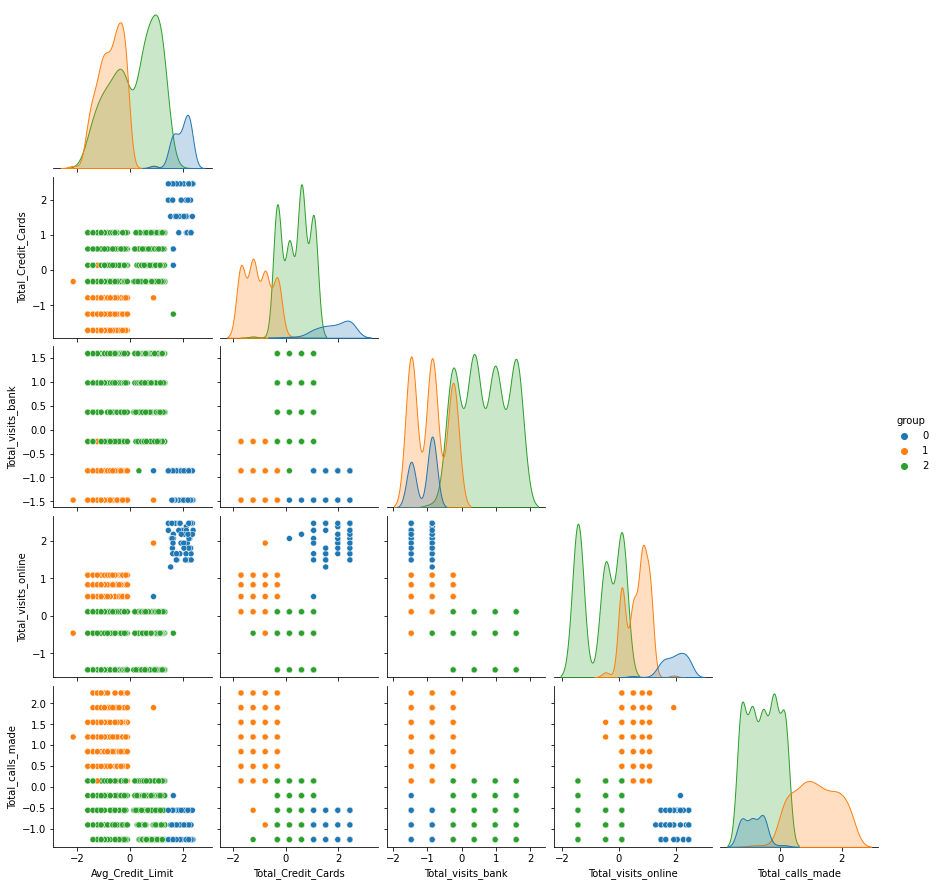

In [67]:
sns.pairplot(k3_labeled_scaled_df, corner=True, diag_kind = 'kde', hue='group')
plt.show()

**Hierarchical**

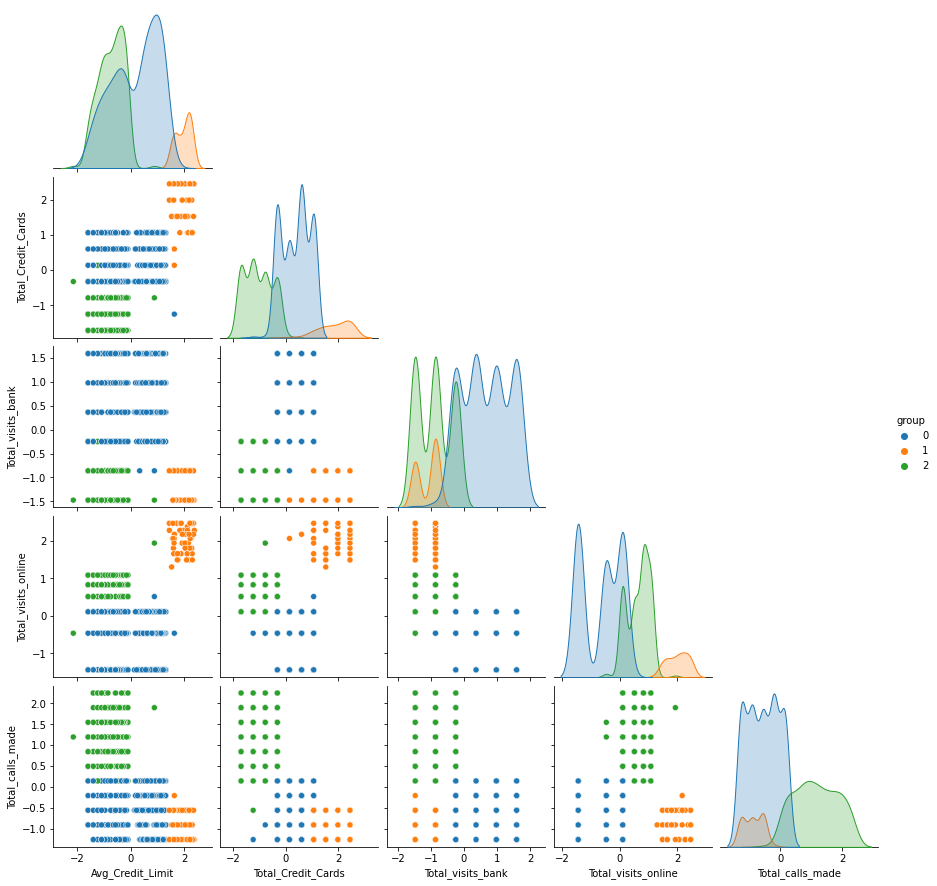

In [68]:
sns.pairplot(agg_clustering_k3_labeled_scaled_df, corner=True, diag_kind = 'kde', hue='group')
plt.show()

**K-Means - PCA:2**

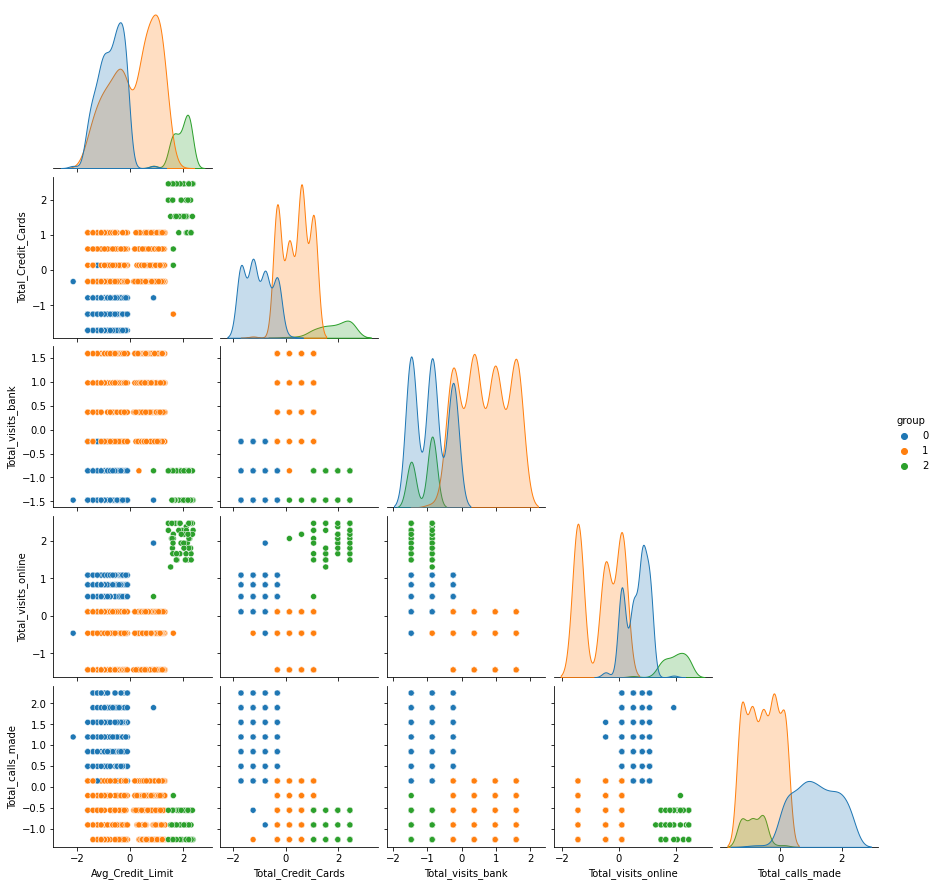

In [69]:
sns.pairplot(kmeans_pca2_K3_model_labeled_scaled_df, corner=True, diag_kind = 'kde', hue='group')
plt.show()

**Insights:**

- From the plots above we can see that visually all techniques give us **vertually identical results**.
- The only visible difference is in how they are assigned the cluster number / group id.

In [70]:
group_mapping_df = pd.DataFrame()
group_mapping_df['K-means'] = ['0', '1', '2']
group_mapping_df['Hierarchical'] = ['1', '2', '0']
group_mapping_df['K-Means PCA2'] = ['2', '0', '1']
group_mapping_df

,K-means,Hierarchical,K-Means PCA2
0,0,1,2
1,1,2,0
2,2,0,1


Although **clustering results** are very similar they are **not identical**. The easiest way to confirm that is to have a look at the **Silhouette Scores** for the clustering results, and as we remember the scores are similar (the **best** is for **K-Means on PCA**), but not the same. We can also compare the distribution of data points between the groups/clusters taking into account our mapping above.

In [71]:
def group_mapping_func1(group):
    if group == 1:
        return 0
    if group == 2:
        return 1
    if group == 0:
        return 2
    raise Exception('bad group id')

def group_mapping_func2(group):
    if group == 2:
        return 0
    if group == 0:
        return 1
    if group == 1:
        return 2
    raise Exception('bad group id')    

In [72]:
k3_group_counts = k3_labeled_df['group'].value_counts().reset_index()

In [73]:
agg_group_counts = agg_clustering_k3_labeled_df['group'].value_counts().reset_index()
agg_group_counts['index'] = agg_group_counts['index'].apply(group_mapping_func1)

In [74]:
kmeans_pca2_counts = kmeans_pca2_K3_model_labeled_df['group'].value_counts().reset_index()
kmeans_pca2_counts['index'] = kmeans_pca2_counts['index'].apply(group_mapping_func2)

In [75]:
group_counts = pd.merge(k3_group_counts, agg_group_counts, on=['index'])
group_counts = pd.merge(group_counts, kmeans_pca2_counts, on=['index'])
group_counts.columns = ['Group', 'K-means', 'Hierarchical', 'K-Means - PCA:2']
group_counts.sort_values(by='Group', inplace=True)
group_counts

,Group,K-means,Hierarchical,K-Means - PCA:2
2,0,51,50,51
1,1,225,224,225
0,2,384,386,384


Let's calculate percentages based of K-Means clustering results

In [76]:
group_counts['Percentage'] = round((group_counts['K-means'] / group_counts['K-means'].sum())*100)
group_counts

,Group,K-means,Hierarchical,K-Means - PCA:2,Percentage
2,0,51,50,51,8.0
1,1,225,224,225,34.0
0,2,384,386,384,58.0


**Insights:**

- Now once we aligned the groups to the K-Means values, we ca see that **Hierarchical** clustering gave us **2** more points in **Group 2**, but **1** less point in the **Group 0** & **Group 1**.
- Hence we can conclude that all strategies gave us very similar results at the end. However **K-Means on PCA** has the best consistency.

# <a id = "conclusions_section"></a>7. Conclusions

So now let us conclude our findings.

**1. How many different segments of customers are there?**
- We discovered **3** groups of customers based on the **number of credit cards** (correlated with credit limits) they have.

**2. How are these segments different from each other?**

**We will refer the group ids as in the K-Means clustering results.**

- **Group 0** - This group consist of clients who have **high number of credit cards** and credit limits, they usually do not go to the bank in person or call, and **prefer to work with the bank online**. This is only **8%** of all clients, the **smallest group**.
- **Group 1** - This group is formed of clients who have **small number of credit cards** and low credit limits, they **prefer to call the bank**, and **sometimes go online**. They less likely to visit the bank in person. This corresponds to **34%** of all clients.
- **Group 2** - This group represens the middle, clients who have **average number of credit cards** and credit limits. They would **rather go to the bank in person** than call or use online services. This represents the **largest group** and accounts for  **58%** of all clients.

**3. What are your recommendations to the bank on how to better market to and service these customers?**

- **Support services**

As we know a lot of clients have complained about it, so the bank needs to start improving things in this area. More than half of the clients belong to the **Group 2**, this group is known to go to the bank's branches more often than any other group, the average credit limit is **33.809**. Also if they dissatisfied with the service it is easier for this group to leave the bank. Hence the first thing to concentrait on is on **improving services on-site at the branches**.

As the following step, the bank should consider **'high-spenders'** with the high credit limits, average limit is **139.254**. This corresponds to the **Group 0**, which means the bank should address its **online services** next. Coincidently and likely for the bank, **Group 1** (34% of the customer base) also use online services sometimes. So the bank can improve support services for the both groups at the same time.

Lastly, **call support** should be improved to cover the rest of the clients in the **Group 1**.

- **New customers** /  **upsale**

Obviously, by improving support services the bank can receive better reviews which should help with attracting **new customers**.

The direction for the **upsale** is from **Group 1** to **Group 2** to **Group 0**. We don't have a lot of information to go on here. But the bank should use its data to learn more about each group we discovered and understand why people prefer a certain number of cards. For instance, it is possible that the bank should update its credit card product portfolio to make it more attractive to the clients.